# Linear Regression Sprint Challenge

Objectives:
* Describe linear regression: the simplest ML model
* Use gradient descent to compute the Linear Regression (LR) parameters
* Predict a vector $v_i$, given its x coordinate and a linear model relating x and y
* Use the matrix form to compute the LR parameters

In [0]:
# Linear Regression is the simplest ML model because:

In regression, one attempts to estimate the relationship between a continuous outcome, or dependent variable, and one or more features, or independent variables.

Typically, the form of the function describing this relationship is specified. Therefore, regression seeks to find the parameters according to the expression $\textbf{E}(Y|X)=f(X, \beta) $, which formalizes the understanding that $Y$ should be approximately equal to a function of $X$ and the parameters. Here $Y$ is the dependent variable, $X$ is the independent variables, and $\beta$ represents the parameters.

The simplest form of a function relating $X$ to $Y$ is a linear one. Polynomial functions involve higher order multiples of the independent variables, and may also contain sums between different terms. Furthermore, other classes of functions such as exponential, logarithmic and trigonometric are also less simple than linear functions.

Linear regression is a Machine Learning model because it determines the best model, given the assumption that it is a linear one, based on the data. The values of the parameters specifying the linear relationship are not explicitly provided.

### 2. Compute Linear Regression Model

Use sklearn.linear_model.LinearRegression to calculate the linear least-squares best fit minimizing $\sum{(w_0x + w_1)-y)^2}$.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
x = np.array([0,1,2,3,4])
y = np.array([-1,2,5,5,9])

# Compute LR
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

# Print coefficients
w0 = model.intercept_
w1 = model.coef_[0]
print('Coefficients\nw0: {:.2f}\nw1: {:.2f}'.format(w0, w1))

Coefficients
w0: -0.60
w1: 2.30


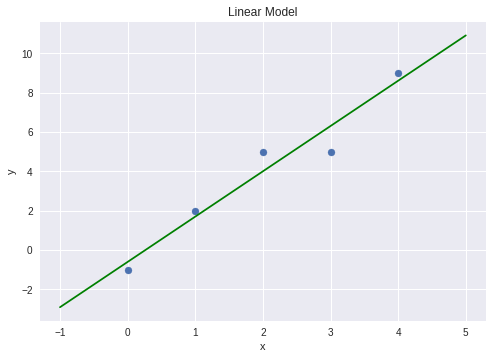

In [4]:
fig, ax = plt.subplots()
ax.scatter(x, y)

x_smooth = np.linspace(-1, 5)
ax.plot(x_smooth, w1*x_smooth + w0, 'g')

ax.set(xlabel='x', ylabel='y', title='Linear Model');

### 3. Predict the value $y_i = f(v_i)$

Since there is only one feature, the model should predict one y-value for each element of $v$

In [5]:
v = [7,2]

# Use the model above to predict y_i here
yv = model.predict(np.array([v]).T)

# Print y
print('y:', yv)

y: [15.5  4. ]


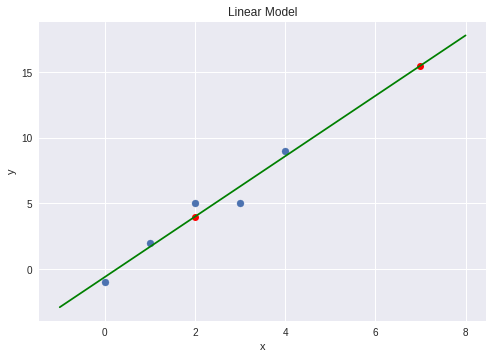

In [6]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(v, yv, 'ro')

x_smooth = np.linspace(-1, 8)
ax.plot(x_smooth, w1*x_smooth + w0, 'g')

ax.set(xlabel='x', ylabel='y', title='Linear Model');

### 4. Use the matrix form to compute Linear Regression

The analytic solution to Linear Least Squares Regression:

$\beta = (X^TX)^{-1}X^TY$

In order to use the analytic solution, we will need to make sure that $X$ and $Y$ are matrices. In the case of $Y$, it will be a column vector, or an n-by-1 matrix.

In order to also solve for the value of the y-intercept, we will need to add a dummy feature to $X$, consisting of 1's. This can be achieved using the [`np.column_stack`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.column_stack.html) and [`np.ones`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ones.html) methods.

In [7]:
# Compute the above equation for x and y

# Print the coefficients produced from this method, which should be equal to
# the coefficients above.

X = np.column_stack([np.ones(len(x)), x])
Y = y.reshape(-1, 1)

left = np.linalg.inv(np.matmul(X.T, X))
right = np.matmul(X.T, Y)
parameters = np.matmul(left, right)

b0, b1 = float(parameters[0]), float(parameters[1])
print('Coefficients via Normal Equation\nb0: {:.2f}\nb1: {:.2f}'.format(b0, b1))

Coefficients via Normal Equation
b0: -0.60
b1: 2.30


By inspection, these match the parameters found using the `sklearn` model.